In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("LifeExpectancyData.csv")

In [6]:
display(df.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
df = df.drop("Hepatitis B", axis=1)

KeyError: "['Hepatitis B'] not found in axis"

In [12]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
columns_to_fill = [
    'Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 
    'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 
    'Income composition of resources', 'Schooling'
]
for column in columns_to_fill:
    df[column] = df.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))


KeyError: 'Column not found: Life expectancy'

In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [17]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [18]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [20]:
columns_to_fill = [
    'life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi', 
    'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population', 
    'income_composition_of_resources', 'schooling'
]
for column in columns_to_fill:
    if column in df.columns:  # Garantir que a coluna existe no DataFrame
        df[column] = df.groupby('country')[column].transform(lambda x: x.fillna(x.mean()))


In [21]:
df = df.drop_duplicates()

In [22]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2921.000000,2938.000000,2938.000000,2904.000000,2938.000000,2938.000000,2906.000000,2938.000000,2938.000000,2533.000000,2.290000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.600849,738.251295,2419.592240,38.321247,42.035739,82.396266,5.920966,82.183944,1.742103,7378.404536,1.273472e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.038985,1987.914858,11467.272489,20.044034,160.445548,23.476067,2.469245,23.743205,5.077785,14172.071842,6.096040e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.910000,4.685343,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,459.291200,1.965672e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.730000,64.912906,17.000000,43.500000,4.000000,93.000000,5.745333,93.000000,0.100000,1726.915100,1.396073e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.700000,441.534144,360.250000,56.200000,28.000000,97.000000,7.440000,97.000000,0.800000,5828.745662,7.407576e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [23]:
df.corr()

ValueError: could not convert string to float: 'Afghanistan'

In [26]:
df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)

country
Japan                    82.53750
Sweden                   82.51875
Iceland                  82.44375
Switzerland              82.33125
France                   82.21875
                           ...   
Niue                          NaN
Palau                         NaN
Saint Kitts and Nevis         NaN
San Marino                    NaN
Tuvalu                        NaN
Name: life_expectancy, Length: 193, dtype: float64

In [29]:
life_expectancy_by_country = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)
top_10_countries = life_expectancy_by_country.head(10)
bottom_10_countries = life_expectancy_by_country.tail(10)

C:\Users\pedro\AppData\Local\Temp\ipykernel_7708\181569740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="viridis")


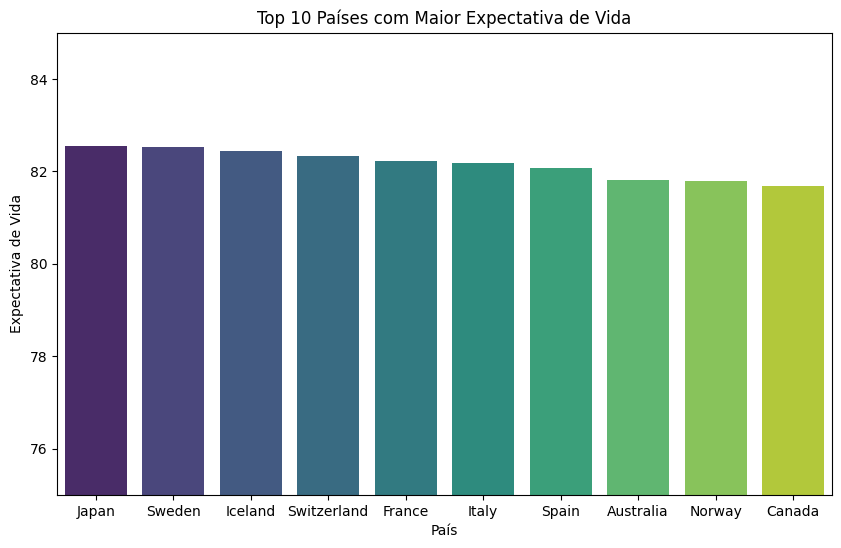

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="viridis")
plt.ylim(75, 85)
plt.title("Top 10 Países com Maior Expectativa de Vida")
plt.xlabel("País")
plt.ylabel("Expectativa de Vida")
plt.show()

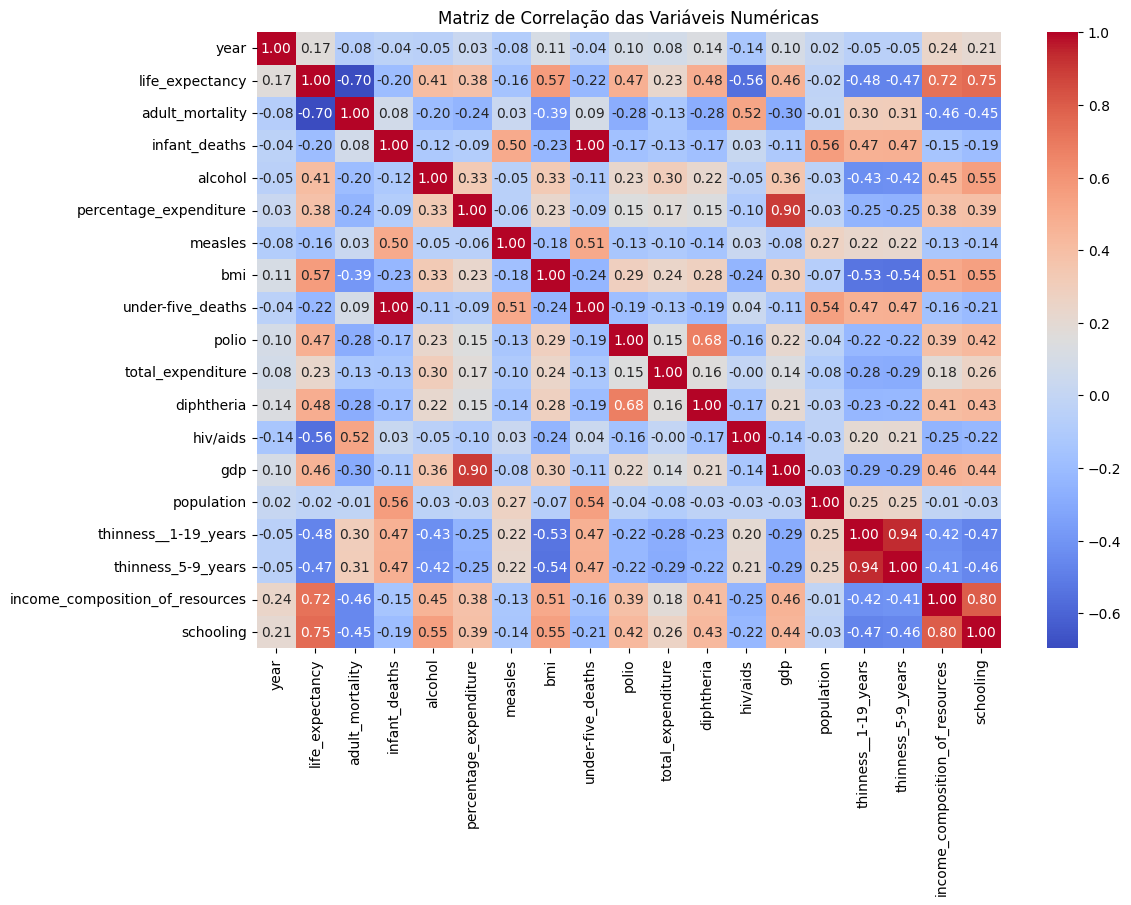

In [37]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()